## 색상을 잘 추출하는지 검사하는 파일입니다!!

전체실행으로 코드를 실행 -> 색 구분이 틀렸다면 n 또는 N 입력 / 맞았으면 엔터로 진행

In [1]:
import openpyxl
import colorgram
import requests
import webcolors
import warnings

import pandas as pd
import matplotlib.pyplot as plt

from rembg import remove
from PIL import Image
from io import BytesIO
from tqdm import tqdm

from IPython.display import clear_output
from typing import List, Tuple, Union

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
# 이미지를 불러오는 함수
def get_img_from_url(url: str) -> Image:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

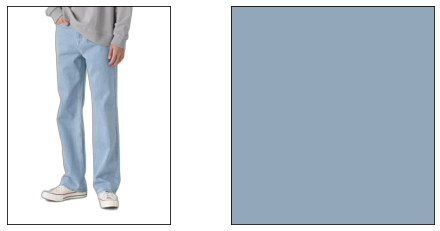

KeyboardInterrupt: Interrupted by user

In [7]:
preprocessed_file_path = '/opt/ml/input/data/asset_codishop/view/item/item.xlsx'
preprocessed_df = pd.read_excel(preprocessed_file_path, engine='openpyxl')

START = 0
END   = 10

fail_list = list()

# preprocessed_df = preprocessed_df.loc[preprocessed_df.cluster_id == 194]

preprocessed_df = preprocessed_df.iloc[START:END]

for idx, item_info in preprocessed_df.iterrows():
    clear_output(wait=True)

    item_id = item_info['id']
    img_url = item_info['img_url']
    R, G, B = item_info['R'], item_info['G'], item_info['B']

    try:
        img = get_img_from_url(img_url)
    except:
        print (f"[Exception] Failed to load image url = {img_url}", flush=True)
        continue
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    fig.set_facecolor('white')
    img = img.resize((240, 320)) # 전처리 속도 향상
    img = remove(img)
    
    axes[0].imshow(img)
    axes[1].set_facecolor((R / 255, G / 255, B / 255))

    axes[0].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    axes[1].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    
    plt.show()

    correction = str(input())
    if correction.lower() == 'n':
        fail_list.append(item_id)
    

In [5]:
print (fail_list)

[104238]
